### Interactive Dashboards

#### 1. Setting up / Importing libraries

#### 2. Importing dataset for analysis / wrangling & cleaning the data

#### 3. K-means clustering

#### 4. Linear Regression (Train/Test)

#### 5. Conclusions 

##### Setting up the environment

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
# FYI only / this line serves to measure performance of this pror
from datetime import datetime ## this is only to keep track of performance
start = datetime.now()

##### Data set used in this analysis
https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset

In [4]:
path = r'C:\Users\joseh\OLIST_Brazil\91_final_project\real estate data'

In [5]:
US_real_estate = pd.read_csv(os.path.join(path, 'realtor-data.csv'))

In [6]:
US_real_estate.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0


In [7]:
US_real_estate.dtypes

status             object
bed               float64
bath              float64
acre_lot          float64
city               object
state              object
zip_code          float64
house_size        float64
prev_sold_date     object
price             float64
dtype: object

##### Eliminate duplicate entries

In [8]:
# unfortunately this data set has too many duplicate entries that need to be eliminated
US_real_estate.duplicated().sum()

794865

In [9]:
US_real_estate1 = US_real_estate[~US_real_estate.duplicated()]

In [10]:
US_real_estate1.duplicated().sum()

0

In [11]:
US_real_estate1.shape

(110101, 10)

##### A review of the data using a map in Tableau put in evidence that most of the records are located in the US NorthEast

In [12]:
US_real_estate1[US_real_estate1['zip_code']>=20000]['zip_code'].value_counts()

23310.0    5
30228.0    4
23336.0    2
95000.0    1
29835.0    1
99999.0    1
37760.0    1
82414.0    1
95652.0    1
24898.0    1
30817.0    1
Name: zip_code, dtype: int64

In [13]:
US_real_estate1[US_real_estate1['zip_code']<=1000]['zip_code'].value_counts()

820.0    322
830.0    144
926.0    111
840.0    106
802.0    104
        ... 
910.0      1
951.0      1
995.0      1
970.0      1
604.0      1
Name: zip_code, Length: 152, dtype: int64

##### Filtering zip codes
* use only __1000 < zip codes < 20000__ 
* zip codes starting with 00 are in the Caribbean: Puerto Rico and Virgin Islands
* zip codes starting with ```0dddd``` and ```1dddd``` are in the North East, mainly in PA, NJ,NY, and more heavily in CT, RI, MA, NH, VT, and ME
* zip codes that start with 3xxxx 4xxxx 5xxxx 8xxxx 9xxxx represent only a handful of entries and will be removed

In [14]:
US_real_estate2 = US_real_estate1[(US_real_estate1['zip_code']<20000)]

In [15]:
US_real_estate2 = US_real_estate2[(US_real_estate2['zip_code']>1000)]

In [16]:
US_real_estate2.describe().T

,count,mean,std,min,25%,50%,75%,max
bed,90996.0,3.305596,1.870204e+00,1.0,2.00,3.00,4.00,123.0
bath,92165.0,2.515141,1.736656e+00,1.0,2.00,2.00,3.00,198.0
acre_lot,77402.0,17.067182,9.485076e+02,0.0,0.11,0.26,1.03,100000.0
zip_code,106701.0,8452.804266,4.443903e+03,1001.0,6107.00,8021.00,10128.00,19977.0
house_size,72546.0,2135.312864,2.636298e+03,100.0,1154.00,1663.00,2491.00,400149.0
price,106683.0,920627.762614,3.494414e+06,0.0,259900.00,450000.00,822992.50,875000000.0


##### Review and eliminate ```null``` values from all columns except ```prev_sold_date``` 
The rationale is that not all homes must have a date when they were previously sold

In [17]:
US_real_estate2.isnull().sum()

status                0
bed               15705
bath              14536
acre_lot          29299
city                  7
state                 0
zip_code              0
house_size        34155
prev_sold_date    48498
price                18
dtype: int64

In [18]:
US_real_estate3 = US_real_estate2.dropna(subset=['bed','bath','acre_lot','city','house_size'])

In [19]:
#cleaned dataset has 50K entries
US_real_estate3.shape

(50314, 10)

In [20]:
US_real_estate3.describe().T

,count,mean,std,min,25%,50%,75%,max
bed,50314.0,3.702031,1.820525e+00,1.0,3.0,3.00,4.00,99.0
bath,50314.0,2.688357,1.830034e+00,1.0,2.0,2.00,3.00,198.0
acre_lot,50314.0,11.597064,7.871027e+02,0.0,0.1,0.23,0.72,100000.0
zip_code,50314.0,8530.268196,5.270774e+03,1001.0,4967.0,7735.00,10469.00,19977.0
house_size,50314.0,2346.178380,2.768686e+03,122.0,1320.0,1851.00,2700.00,400149.0
price,50314.0,779698.184521,1.768163e+06,500.0,279900.0,445000.00,749999.00,169000000.0


##### Eliminate houses larger than 4,000 sq ft / considered outliers for this analysis

In [21]:
US_real_estate3 = US_real_estate3[ US_real_estate3['house_size']<=4000 ]

In [22]:
US_real_estate3.shape

(45620, 10)

##### Summary: eliminated approx. 859K entries including (a) duplicates, (b) zip codes outside the NorthEast, and (c) houses larger than 4,000 sq ft

In [23]:
# number of rows eliminated from original data set
US_real_estate.shape[0]-US_real_estate3.shape[0]

859346

In [24]:
US_real_estate3.columns

Index(['status', 'bed', 'bath', 'acre_lot', 'city', 'state', 'zip_code',
       'house_size', 'prev_sold_date', 'price'],
      dtype='object')

In [25]:
US_real_estate3.reset_index(drop=True,inplace=True)

##### Create a derived field: ```price_per_sqft``` to normalize the price to the size of the house

In [26]:
US_real_estate3['price_per_sqft'] = US_real_estate3['price']/US_real_estate3['house_size']

##### Introduce latitude/longitude derived from zip codes

In [27]:
# source: https://gist.github.com/erichurst/7882666
zip_lat_long = pd.read_csv(os.path.join(path,'zip_lat_long_gov.csv'))

In [28]:
zip_lat_long.columns

Index(['zip_code', 'zip_code_txt', 'latitude', 'longitude'], dtype='object')

In [29]:
US_real_estate3 = US_real_estate3.merge(zip_lat_long, on='zip_code', how='inner')
US_real_estate3.describe().T

,count,mean,std,min,25%,50%,75%,max
bed,45588.0,3.458651,1.270119,1.000000,3.000000,3.000000,4.000000,2.400000e+01
bath,45588.0,2.387251,1.030194,1.000000,2.000000,2.000000,3.000000,1.900000e+01
acre_lot,45588.0,12.148818,826.840320,0.000000,0.090000,0.210000,0.570000,1.000000e+05
zip_code,45588.0,8649.054181,5320.522116,1001.000000,5160.250000,7866.000000,10538.000000,1.997700e+04
house_size,45588.0,1893.551856,783.048339,122.000000,1275.000000,1740.000000,2400.000000,4.000000e+03
price,45588.0,575173.646947,658302.770189,500.000000,269000.000000,409000.000000,670000.000000,2.990000e+07
price_per_sqft,45588.0,307.880463,296.105169,0.204583,171.559886,236.612522,339.030460,1.031034e+04
zip_code_txt,45588.0,8649.054181,5320.522116,1001.000000,5160.250000,7866.000000,10538.000000,1.997700e+04
latitude,45588.0,41.200908,1.338152,38.933446,40.048483,41.020746,41.821417,4.732171e+01
longitude,45588.0,-73.364343,1.651049,-77.521042,-74.789973,-73.835253,-72.263453,-6.700891e+01


### Clustering - the elbow technique

In [30]:
#obtaining a subset of numeric fields only -to perform clustering
subset_df = US_real_estate3[['bed','bath','acre_lot','house_size','price','price_per_sqft','latitude','longitude']]

In [31]:
num_cl = range(1, 8) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [32]:
score = [kmeans[i].fit(subset_df).score(subset_df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.
score

[-1.975576110095776e+16,
 -1.008375477288098e+16,
 -5949705985458773.0,
 -3968631870934287.5,
 -2652825424926356.0,
 -1853503993965455.0,
 -1471691546930870.0]

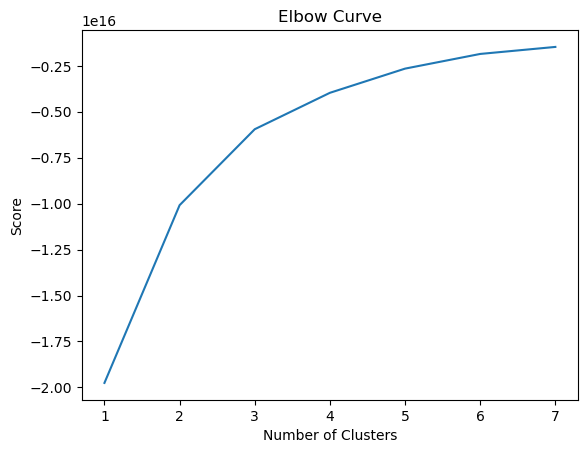

In [33]:
# Plot the elbow curve using PyLab.
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### k-means clustering

In [34]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 4)

# Fit the k-means object to the data.
kmeans.fit(subset_df)

KMeans(n_clusters=4)

In [35]:
subset_df['clusters'] = kmeans.fit_predict(subset_df)

C:\Users\joseh\AppData\Local\Temp\ipykernel_31704\3030728355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['clusters'] = kmeans.fit_predict(subset_df)


In [36]:
subset_df['clusters'].value_counts()

0    33247
1    10739
3     1486
2      116
Name: clusters, dtype: int64

In [37]:
subset_df.columns

Index(['bed', 'bath', 'acre_lot', 'house_size', 'price', 'price_per_sqft',
       'latitude', 'longitude', 'clusters'],
      dtype='object')

In [38]:
subset_df.describe().T

,count,mean,std,min,25%,50%,75%,max
bed,45588.0,3.458651,1.270119,1.000000,3.000000,3.000000,4.000000,2.400000e+01
bath,45588.0,2.387251,1.030194,1.000000,2.000000,2.000000,3.000000,1.900000e+01
acre_lot,45588.0,12.148818,826.840320,0.000000,0.090000,0.210000,0.570000,1.000000e+05
house_size,45588.0,1893.551856,783.048339,122.000000,1275.000000,1740.000000,2400.000000,4.000000e+03
price,45588.0,575173.646947,658302.770189,500.000000,269000.000000,409000.000000,670000.000000,2.990000e+07
price_per_sqft,45588.0,307.880463,296.105169,0.204583,171.559886,236.612522,339.030460,1.031034e+04
latitude,45588.0,41.200908,1.338152,38.933446,40.048483,41.020746,41.821417,4.732171e+01
longitude,45588.0,-73.364343,1.651049,-77.521042,-74.789973,-73.835253,-72.263453,-6.700891e+01
clusters,45588.0,0.338444,0.651595,0.000000,0.000000,0.000000,1.000000,3.000000e+00


C:\Users\joseh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


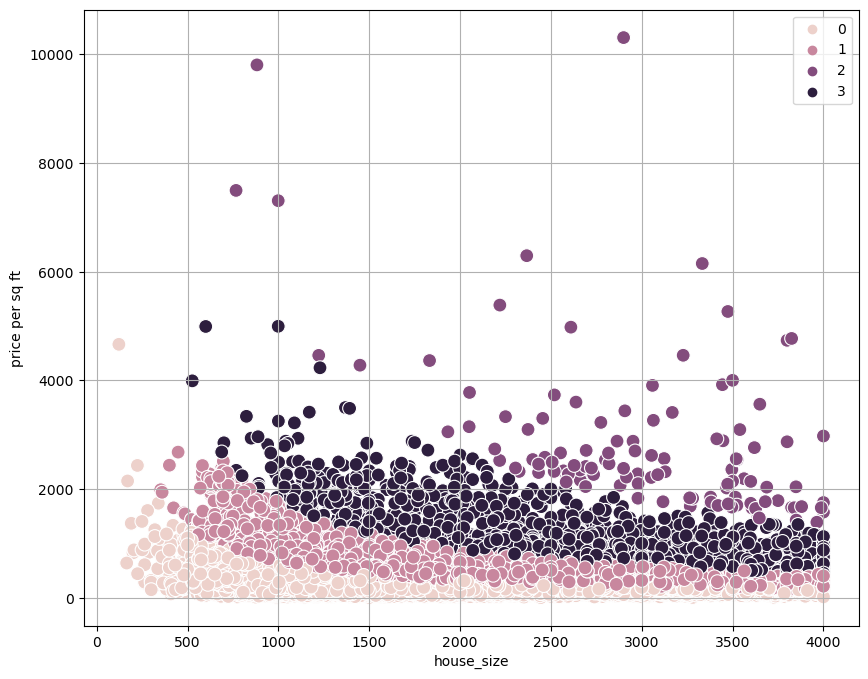

In [39]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(10,8))
x=subset_df['house_size']
ax = sns.scatterplot(x, y=subset_df['price_per_sqft'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(True) # This removes the grid from the background.
plt.xlabel('house_size') # Label x-axis.
plt.ylabel('price per sq ft') # Label y-axis.
plt.show()

In [40]:
US_real_estate3['clusters']=subset_df['clusters']

In [41]:
US_real_estate3.to_pickle(os.path.join(path,'real_estate_v3.pkl'))

##### Histogram of data

C:\Users\joseh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='house_size', ylabel='Density'>

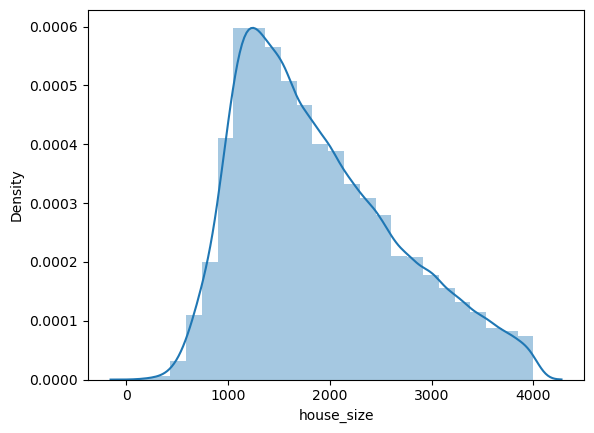

In [42]:
sns.distplot(US_real_estate3['house_size'], bins=25, kde = True) # Shows extreme values

#### As expected, the majority of houses are under 2,500 Sq. Ft. and the mode is around 1,200 Sq. Ft. which is a typical or "normal" house for a family

C:\Users\joseh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price_per_sqft', ylabel='Density'>

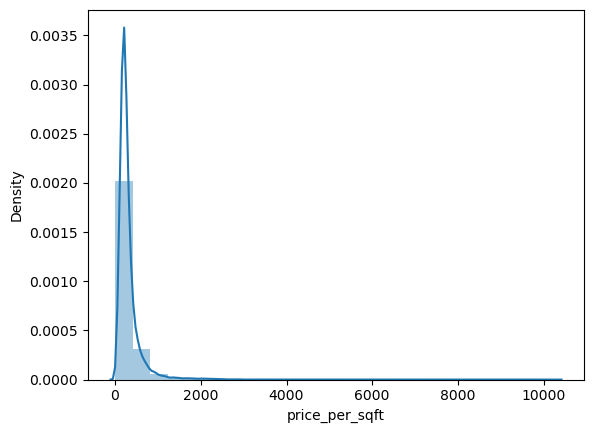

In [43]:
sns.distplot(US_real_estate3['price_per_sqft'], bins=25, kde = True) # Shows extreme values

In [44]:
US_real_estate3.groupby('clusters')['price_per_sqft'].describe().T

clusters,0,1,2,3
count,33247.000000,10739.000000,116.000000,1486.000000
mean,218.851955,448.138499,2860.053252,1086.916604
std,112.241238,257.368897,1509.282540,564.204034
min,0.204583,162.907268,1387.487386,449.750000
25%,151.194027,288.795341,2029.615535,685.344594
50%,203.026947,376.420455,2400.153665,900.000000
75%,263.545455,519.603922,3108.615694,1324.362529
max,4663.016393,2678.571429,10310.344828,4994.994995


Summary of findings:
Clusters have been selected roughly based on price per sq. ft.

* Cluster 0 has 33K entries and it is centered around $200 / sq.ft.

* Cluster 1 has 11K entries and it is centered around $370 / sq.ft.

* Cluster 3 has 1.5K entries and it is centered around $900 / sq.ft.

* Cluster 2 has 117 entries and it is centered around $2.4K / sq.ft.

In [45]:
US_real_estate3.groupby('clusters')['house_size'].describe().T

clusters,0,1,2,3
count,33247.000000,10739.000000,116.000000,1486.000000
mean,1684.493037,2417.277400,2993.750000,2700.191790
std,659.983424,802.890515,677.022636,816.645054
min,122.000000,352.000000,767.000000,526.000000
25%,1200.000000,1825.500000,2593.000000,2147.000000
50%,1548.000000,2434.000000,3053.000000,2792.500000
75%,2052.000000,3016.500000,3516.250000,3350.000000
max,4000.000000,4000.000000,4000.000000,4000.000000


House size is not a determinant factor in clustering as we can see the quartiles do not discriminate one group over the others

### Linear Regression

#### Linear Regression models
1. Cluster 0 shows a very low R2 score of 0.15 - this is the largest cluster by size (in the order of 30K entries)
2. Cluster 3 has a medium fit with an R2 score of 0.56 - this is the 3rd cluster in size (in the order of 1K entries)
3. Cluster 1 has a fit below medium with an R2 score of 0.46 - this is the second largest cluster (in the order of 10K entries)
4. Cluster 2 has a fit below medium with an R2 score of 0.28 - this is the smallest cluster (in the order of 0.1K entries)

##### Regression on cluster 0

In [46]:
US_real_estate3[US_real_estate3['clusters']==0].shape

(33247, 15)

In [47]:
#run a regression on cluster 0
X0 = US_real_estate3[US_real_estate3['clusters']==0]['house_size'].values.reshape(-1,1)
y0 = US_real_estate3[US_real_estate3['clusters']==0]['price_per_sqft'].values.reshape(-1,1)

In [48]:
X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, test_size=0.3, random_state=0)

In [49]:
# Run and fit the regression.
regression = LinearRegression()  
regression.fit(X0_train, y0_train)

LinearRegression()

In [50]:
# Predict
y0_predicted = regression.predict(X0_test)

In [51]:
rmse = mean_squared_error(y0_test, y0_predicted)
r2 = r2_score(y0_test, y0_predicted)

In [52]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.06454607]]
Mean squared error:  9944.326919309402
R2 score:  0.1495238555477787


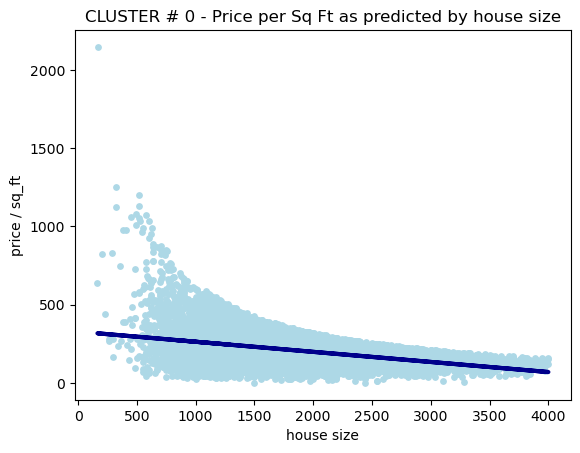

In [53]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X0_test, y0_test, color='lightblue', s = 15 )
plot_test.plot(X0_test, y0_predicted, color='darkblue', linewidth =3)
plot_test.title('CLUSTER # 0 - Price per Sq Ft as predicted by house size')
plot_test.xlabel('house size')
plot_test.ylabel('price / sq_ft')
plot_test.show()

##### Regression on cluster 1

In [54]:
US_real_estate3[US_real_estate3['clusters']==1].shape

(10739, 15)

In [55]:
#run a regression on cluster 0
X1 = US_real_estate3[US_real_estate3['clusters']==1]['house_size'].values.reshape(-1,1)
y1 = US_real_estate3[US_real_estate3['clusters']==1]['price_per_sqft'].values.reshape(-1,1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)

# Run and fit the regression.
regression = LinearRegression()  
regression.fit(X1_train, y1_train)

LinearRegression()

In [56]:
# Predict
y1_predicted = regression.predict(X1_test)

In [57]:
rmse = mean_squared_error(y1_test, y1_predicted)
r2 = r2_score(y1_test, y1_predicted)

In [58]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.22160884]]
Mean squared error:  35120.65276984082
R2 score:  0.45501670738773026


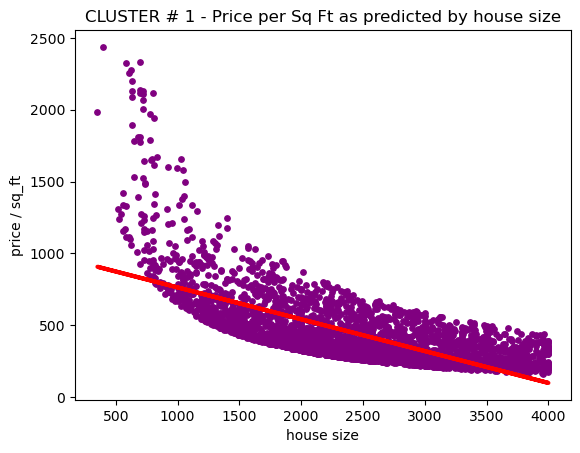

In [59]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X1_test, y1_test, color='purple', s = 15)
plot_test.plot(X1_test, y1_predicted, color='red', linewidth =3)
plot_test.title('CLUSTER # 1 - Price per Sq Ft as predicted by house size')
plot_test.ylabel('price / sq_ft')
plot_test.xlabel('house size')
plot_test.show()

##### Regression on cluster 2

In [60]:
US_real_estate3[US_real_estate3['clusters']==2].shape

(116, 15)

In [61]:
#run regression 
X2 = US_real_estate3[US_real_estate3['clusters']==2]['house_size'].values.reshape(-1,1)
y2 = US_real_estate3[US_real_estate3['clusters']==2]['price_per_sqft'].values.reshape(-1,1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0)

# Run and fit the regression.
regression = LinearRegression()  
regression.fit(X2_train, y2_train)

LinearRegression()

In [62]:
# Predict
y2_predicted = regression.predict(X2_test)

# measure regression fit
rmse = mean_squared_error(y2_test, y2_predicted)
r2 = r2_score(y2_test, y2_predicted)

# show results
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-1.14404859]]
Mean squared error:  1155720.4951404163
R2 score:  0.2800508351167569


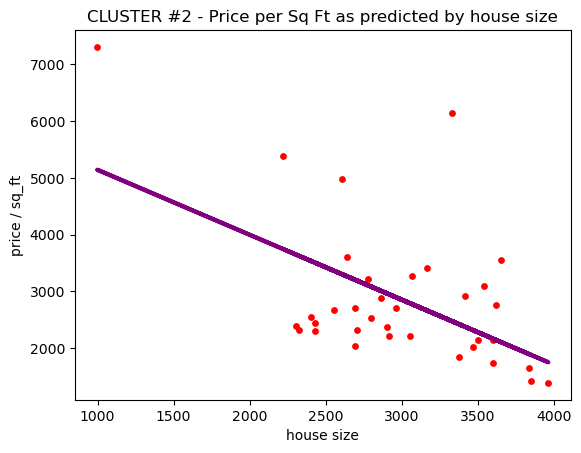

In [63]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X2_test, y2_test, color='red', s = 15)
plot_test.plot(X2_test, y2_predicted, color='purple', linewidth =3)
plot_test.title('CLUSTER #2 - Price per Sq Ft as predicted by house size')
plot_test.ylabel('price / sq_ft')
plot_test.xlabel('house size')
plot_test.show()

##### Regression on cluster 3

In [64]:
US_real_estate3[US_real_estate3['clusters']==3].shape

(1486, 15)

In [65]:
#run regression 
X3 = US_real_estate3[US_real_estate3['clusters']==3]['house_size'].values.reshape(-1,1)
y3 = US_real_estate3[US_real_estate3['clusters']==3]['price_per_sqft'].values.reshape(-1,1)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=0)

# Run and fit the regression.
regression = LinearRegression()  
regression.fit(X3_train, y3_train)

LinearRegression()

In [66]:
# Predict
y3_predicted = regression.predict(X3_test)

# measure regression fit
rmse = mean_squared_error(y3_test, y3_predicted)
r2 = r2_score(y3_test, y3_predicted)

# show results
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.49975211]]
Mean squared error:  155759.9928083652
R2 score:  0.5577132683063111


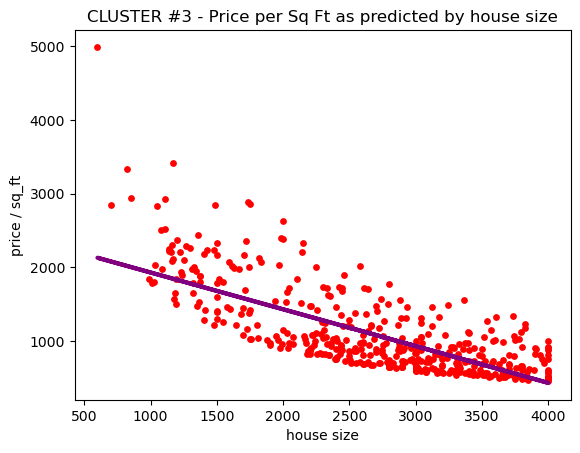

In [67]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X3_test, y3_test, color='red', s = 15)
plot_test.plot(X3_test, y3_predicted, color='purple', linewidth =3)
plot_test.title('CLUSTER #3 - Price per Sq Ft as predicted by house size')
plot_test.ylabel('price / sq_ft')
plot_test.xlabel('house size')
plot_test.show()

In [69]:
# used to export to excel and review the results in Tableau
# US_real_estate3.to_excel(os.path.join(path,'real_estate_v3.xlsx'))

### Conclusions
1. Though the clustering algorithm was able to group entries, the cluster sizes were too large to provide strong insights about specific areas
2. To make better predictions it will help to add more qualifying attributes to identify locations that have more "similar" houses in terms of location & price
3. During the analysis conducted with Tableau a quadratic polynomial regression yielded improvements in R2 from 0.5 to 0.6 ( see https://public.tableau.com/app/profile/jose.hanchi/viz/Real_Estate_Analysis_16989027751240/RealEstate )
4. One important next step is to focus on targeted areas and gather more data (_most likely behing a paywall_) to create a better model to predict house-prices.

In [70]:
# fyi only - to track overall run time of this notebook
print(' time to run this notebook h:mm:ss: ', datetime.now() - start)

 time to run this notebook h:mm:ss:  0:00:09.151768
